<a href="https://colab.research.google.com/github/clayid/Basis_Data/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pydotplus
from IPython.display import Image
from sklearn import tree

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# Bagian Baru

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hepatitis.csv',delimiter=',')
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['age']=enc.fit_transform(data['age'].values)
data['sex']=enc.fit_transform(data['sex'].values)
data['steroid']= enc.fit_transform(data['steroid'].values)
data['antivirals']= enc.fit_transform(data['antivirals'].values)
data['fatigue']= enc.fit_transform(data['fatigue'].values)
data['malaise']= enc.fit_transform(data['malaise'].values)
data['anorexia']= enc.fit_transform(data['anorexia'].values)
data['liver_big']= enc.fit_transform(data['liver_big'].values)
data['liver_firm']= enc.fit_transform(data['liver_firm'].values)
data['spleen_palable']= enc.fit_transform(data['spleen_palable'].values)
data['spiders']= enc.fit_transform(data['spiders'].values)
data['ascites']= enc.fit_transform(data['ascites'].values)
data['varices']= enc.fit_transform(data['varices'].values)
data['bilirubin']= enc.fit_transform(data['bilirubin'].values)
data['alk_phosphate']= enc.fit_transform(data['alk_phosphate'].values)
data['sgot']= enc.fit_transform(data['sgot'].values)
data['albumin']= enc.fit_transform(data['albumin'].values)
data['protime']= enc.fit_transform(data['protime'].values)
data['histology']= enc.fit_transform(data['histology'].values)


In [ ]:
data.dtypes

class             int64
age               int64
sex               int64
steroid           int64
antivirals        int64
fatigue           int64
malaise           int64
anorexia          int64
liver_big         int64
liver_firm        int64
spleen_palable    int64
spiders           int64
ascites           int64
varices           int64
bilirubin         int64
alk_phosphate     int64
sgot              int64
albumin           int64
protime           int64
histology         int64
dtype: object

In [ ]:
data.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,9,1,0,1,1,1,1,0,1,1,1,1,1,7,31,3,17,25,0
1,2,29,0,0,1,0,1,1,0,1,1,1,1,1,6,55,19,11,25,0
2,2,46,0,1,1,0,1,1,1,1,1,1,1,1,4,37,13,17,25,0
3,2,13,0,1,1,1,1,1,1,1,1,1,1,1,7,41,72,17,25,0
4,2,13,0,1,1,1,1,1,1,1,1,1,1,1,6,36,9,17,35,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   class           142 non-null    int64
 1   age             142 non-null    int64
 2   sex             142 non-null    int64
 3   steroid         142 non-null    int64
 4   antivirals      142 non-null    int64
 5   fatigue         142 non-null    int64
 6   malaise         142 non-null    int64
 7   anorexia        142 non-null    int64
 8   liver_big       142 non-null    int64
 9   liver_firm      142 non-null    int64
 10  spleen_palable  142 non-null    int64
 11  spiders         142 non-null    int64
 12  ascites         142 non-null    int64
 13  varices         142 non-null    int64
 14  bilirubin       142 non-null    int64
 15  alk_phosphate   142 non-null    int64
 16  sgot            142 non-null    int64
 17  albumin         142 non-null    int64
 18  protime         142 non-null  

In [ ]:
atr_data = data.drop(columns='class')
atr_data.head()


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,9,1,0,1,1,1,1,0,1,1,1,1,1,7,31,3,17,25,0
1,29,0,0,1,0,1,1,0,1,1,1,1,1,6,55,19,11,25,0
2,46,0,1,1,0,1,1,1,1,1,1,1,1,4,37,13,17,25,0
3,13,0,1,1,1,1,1,1,1,1,1,1,1,7,41,72,17,25,0
4,13,0,1,1,1,1,1,1,1,1,1,1,1,6,36,9,17,35,0


In [ ]:
cls_data=data['class']
cls_data.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(atr_data, cls_data, test_size=0.3, random_state=0)
tree_data = DecisionTreeClassifier(random_state=0)
tree_data.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = tree_data.predict(X_test)

In [ ]:
print('Nilai Akurasi:', tree_data.score(X_test, y_test))

Nilai Akurasi: 0.7906976744186046


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file='hepatitis.dot', class_names=["1", "0"],
                feature_names=atr_data.columns, impurity=False, filled=True)

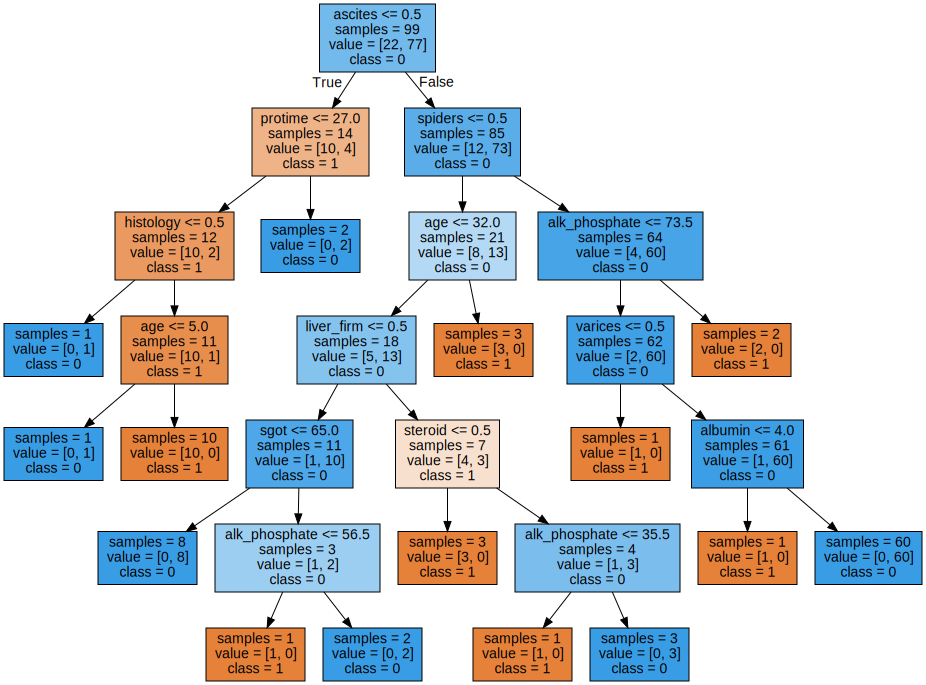

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
with open('hepatitis.dot') as fig: dot_graph = fig.read()
graphviz.Source(dot_graph)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 3  1]
 [ 8 31]]


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)